In [29]:
import networkx as nx
import itertools 
import matplotlib.pyplot as plt
import ipywidgets as widgets

##### Чтобы построить граф, пройдите к заголовку ["Группа целых чисел"](#Z). Чтобы построить граф на симметрической группе, пройдите к заголовку ["Симметрическая группа"](#sym). 



In [30]:


class MyError(ValueError):
    def __init__(self, text):
        self.txt = text

class CayZ(nx.Graph):#граф Кэли на целых числах с операцией сложения
    def __init__(self,n,S): 
        if n<=0:
            raise MyError("неподходящее n")
        for s in S:           #проверка и дополнение порождающего множества
            if type(s)!=int:
                raise MyError('используйте целые числа')
            if s>n or s<0:
                raise MyError('в порождающем множестве неподходящие элементы')
            if not (-s in S or n-s in S):
                S.append(-s) 

        nx.Graph.__init__(self)
        self.n=n
        self.S=S
        
        nodes=range(n)
        self.add_nodes_from(nodes)
        for v in self.nodes:
            for s in S:
                c=(v+s)%n
                self.add_edge(c,v)
    


def draw_CayZ(G):
    nx.draw_kamada_kawai(G,
             node_color='y',
             node_size=1000,
             with_labels=True)
    print("S:",end="{")
    for a in G.S:
        print(a,end=",")
    print("}")
    isr=nx.is_distance_regular(G)
    if isr:
        print("Граф дистанционно регулярный с массивом пересечений (b, c)")
        print(nx.intersection_array(G))


In [31]:
build = widgets.Button(description='Построить граф', button_style='primary')
matrix= widgets.Button(description='Построить матрицу смежности',  button_style='primary',
                      layout=widgets.Layout(width='25%'))
spectrum = widgets.Button(description='Вычислить спектр', button_style='primary')

def on_build(b):
    global G
    G=CayZ(n,S)
    draw_CayZ(G)
    
def on_matrix(b):
    print(nx.adjacency_matrix(G).todense()) 
    
def on_spectrum(b):
    print("Числа приблизительные")

    sp=nx.adjacency_spectrum(G)
    for c in sp:
        if c.imag==0:
            print( '%.9f' % c.real, end=",")
        else:
            print(c)    


#display(group_type)
#display(number)
#n=number.value
   
build.on_click(on_build)
matrix.on_click(on_matrix)
spectrum.on_click(on_spectrum)

# Группа целых чисел <a id='Z'></a>
##### Ниже приведён пример построения графа Кэли. Чтобы построить свой граф, укажите n и S, затем обновите ячейку и нажмите на кнопку "Построить граф". Если граф дистанционно регулярный - появится соответствующая надпись. Если нет - то ничего написано не будет. В нижних ячейках можно построить матрицу смежности и вычислить спектр. Перед выполнением этих операций обязательно постройте нужный граф. (Обновлять каждый раз соответствующие ячейки необязательно)

["Симметрическая группа"](#sym).

In [32]:

n=6 # укажите порядок группы
S=[1,4] # укажите порождающее множество в формате [a1,a2,a3,...ar]. 
        #Если задать незамкнутое множество, оно будет дополнено до замкнутого.

display(build)


Button(button_style='primary', description='Построить граф', style=ButtonStyle())

### Матрица смежности

In [33]:
display(matrix)


Button(button_style='primary', description='Построить матрицу смежности', layout=Layout(width='25%'), style=Bu…

### Спектр

In [34]:
display(spectrum)

Button(button_style='primary', description='Вычислить спектр', style=ButtonStyle())

In [35]:
def concat(per1,per2,n):
    if len(per1)<n:
        e=tuple(range(1, n+1))
        wper1=[]
        for p in e:
            if p in per1:
                try:
                    wper1.append(per1[per1.index(p)+1])
                except IndexError:
                    wper1.append(per1[0])
            else:
                wper1.append(p)
        return wper1
    else:
        return 0
concat((1,2,4),3,5)

[2, 4, 3, 1, 5]

In [41]:
def concat(per1,per2,n):
    if len(per1)<n:
        e=tuple(range(1, n+1))
        wper1=[]
        for p in e:
            if p in per1:
                try:
                    wper1.append(per1[per1.index(p)+1])
                except IndexError:
                    wper1.append(per1[0])
            else:
                wper1.append(p)
        wper1=tuple(wper1)
    else:
        wper1=per1
        
    if len(per2)<n:
        e=tuple(range(1, n+1))
        wper2=[]
        for p in e:
            if p in per2:
                try:
                    wper2.append(per2[per2.index(p)+1])
                except IndexError:
                    wper2.append(per2[0])
            else:
                wper2.append(p)
        wper2=tuple(wper2)
    else:
        wper2=per2
        
    res=[]
    for p in wper2:
        res.append(wper1[p-1])
    return tuple(res)


class CaySym(nx.DiGraph):
    def __init__(self,n,S):
        nx.DiGraph.__init__(self)
        if type(n)!=int:
                raise MyError('используйте целые числа')
        self.n=n
        for s in S:
            if type(s)!=tuple:
                raise MyError("порождающее множество задано неверно")
            if len(s)>n:
                raise MyError("в порождающем множестве перестановки не той длины")
            for e in s:
                if e>n or e<1:
                    raise MyError("нельзя задать такую перестановку")
        self.S=S
        perm=itertools.permutations(range(1,n+1),n)
        self.add_nodes_from(perm)
        nodes=list(self.nodes)
        for node in nodes:
            for s in S:
                if (node,concat(node,s, n)) not in self.edges:
                    self.add_edge(node,concat(node,s, n))




def draw_CaySym(g):
    plt.subplots(1,1,figsize=(15,15))
    options={'width':3}
    nx.draw_kamada_kawai(g, **options,
             node_color='y',
             node_size=3000,
             with_labels=True, font_weight='bold',  linewidths=2, arrowsize=20)
    isr=nx.is_distance_regular(g)
    if isr:
        print("Граф дистанционно регулярный")
#draw_CaySym(g)



In [37]:
builds = widgets.Button(description='Построить граф', button_style='primary')
matrixs= widgets.Button(description='Построить матрицу смежности',  button_style='primary',
                      layout=widgets.Layout(width='25%'))
spectrums = widgets.Button(description='Вычислить спектр', button_style='primary')

def on_builds(b):
    global H
    H=CaySym(n,S)
    draw_CaySym(H)
    
def on_matrixs(b):
    print(nx.adjacency_matrix(H).todense()) 
    
def on_spectrums(b):
    print("Числа приблизительные")

    sp=nx.adjacency_spectrum(H)
    for c in sp:
        if c.imag==0:
            print( '%.9f' % c.real, end=",")
        else:
            print(c)    


#display(group_type)
#display(number)
#n=number.value
   
builds.on_click(on_builds)
matrixs.on_click(on_matrixs)
spectrums.on_click(on_spectrums)

## Симметрическая группа <a id='sym'></a>
##### Ниже приведён пример построения графа Кэли. Чтобы построить свой граф, укажите n и S, затем обновите ячейку и нажмите на кнопку "Построить граф". Если граф дистанционно регулярный - появится соответствующая надпись. Если нет - то ничего написано не будет. В нижних ячейках можно построить матрицу смежности и вычислить спектр. Перед выполнением этих операций обязательно постройте нужный граф. (Обновлять каждый раз соответствующие ячейки необязательно).

["Группа целых чисел"](#Z)

Button(button_style='primary', description='Построить граф', style=ButtonStyle())

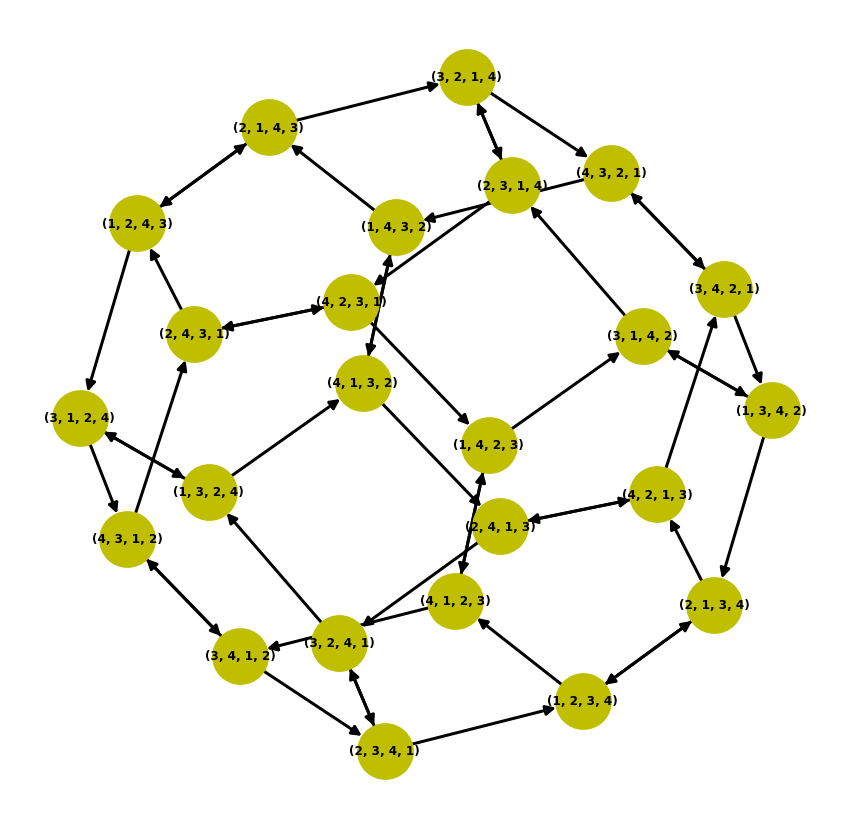

In [45]:

n=4 # укажите порядок группы
S=[(1,2),(4,1,2,3)] # укажите порождающее множество в формате [a1,a2,a3,...ar]. 
        #Если задать незамкнутое множество, оно будет дополнено до замкнутого.

display(builds)


### Матрица смежности

In [39]:
display(matrixs)


Button(button_style='primary', description='Построить матрицу смежности', layout=Layout(width='25%'), style=Bu…

[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0

### Спектр

In [43]:
display(spectrums)

Button(button_style='primary', description='Вычислить спектр', style=ButtonStyle())

Числа приблизительные
2.000000000,-2.000000000,1.000000000,1.000000000,-1.000000000,-1.000000000,(0.7606898534022838+0.857873626595179j)
(0.7606898534022838-0.857873626595179j)
(0.7606898534022856+0.8578736265951784j)
(0.7606898534022856-0.8578736265951784j)
1.521379707,1.521379707,1.521379707,(0.7606898534022832+0.8578736265951783j)
(0.7606898534022832-0.8578736265951783j)
(-0.7606898534022835+0.8578736265951787j)
(-0.7606898534022835-0.8578736265951787j)
(-0.7606898534022821+0.8578736265951764j)
(-0.7606898534022821-0.8578736265951764j)
(-0.7606898534022837+0.8578736265951786j)
(-0.7606898534022837-0.8578736265951786j)
-1.521379707,-1.521379707,-1.521379707,